# **African Basin Data Analysis**

Let's upload our Python libraries

In [ ]:
# tiff added this
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **Let's upload the geopackage file from our Drive**

In [ ]:
gdf = gpd.read_file('/content/drive/Shareddrives/R&D/PROJECTS/Database_Mining/Africa /Congo_Basin_Mining_Concessions.gpkg')
# Select the desired columns
selected_columns = ['COUNTRY_NAME', 'OPERATOR', 'CONC_TYPE', 'RESOURCE', 'PRIMARY_SOURCE', 'AREA_KM2', 'geometry']
gdf_selected = gdf[selected_columns].copy()

# Replace NaN values with "Unk"
gdf_selected.fillna("UNKNOWN", inplace=True)
gdf_selected

,COUNTRY_NAME,OPERATOR,CONC_TYPE,RESOURCE,PRIMARY_SOURCE,AREA_KM2,geometry
0,Republic of Cameroon,AUCAM SARL Mandoum 174,Research permits,All minerals,GLOBAL FOREST WATCH,681.490779,"MULTIPOLYGON (((13.92472 9.89778, 13.95194 9.8..."
1,Republic of Cameroon,UNKNOWN,UNKNOWN,UNKNOWN,GLOBAL FOREST WATCH,980.796361,"MULTIPOLYGON (((12.88299 6.39281, 12.85188 6.5..."
2,Republic of Cameroon,UNKNOWN,UNKNOWN,UNKNOWN,GLOBAL FOREST WATCH,930.649617,"MULTIPOLYGON (((13.82157 9.11592, 13.76559 9.2..."
3,Republic of Cameroon,BEIG3 Bibemi 217,Research permits,"au, related substances",GLOBAL FOREST WATCH,1173.061552,"MULTIPOLYGON (((12.23328 6.67978, 12.04717 6.8..."
4,Republic of Cameroon,C&K Mining Inc. Dankali 163,Research permits,Sapphire,GLOBAL FOREST WATCH,827.978910,"MULTIPOLYGON (((14.14991 6.09945, 14.47352 6.0..."
...,...,...,...,...,...,...,...
7791,Republic of the Congo,SCREM,Exploration Permit,"Gold, related substances",GLOBAL FOREST WATCH,981.247735,"MULTIPOLYGON (((14.36323 0.38788, 14.36338 0.5..."
7792,Republic of the Congo,Congo Iron s.a,Exploration Permit,Iron,GLOBAL FOREST WATCH,460.731627,"MULTIPOLYGON (((14.04025 1.85876, 14.14167 1.8..."
7793,Republic of the Congo,Africa Invest Grp Cgo,Exploration Permit,Uranium,GLOBAL FOREST WATCH,629.333457,"MULTIPOLYGON (((11.63033 -3.88293, 11.92927 -4..."
7794,Republic of the Congo,Africa Invest Grp Cgo,Exploration Permit,Phosphate,GLOBAL FOREST WATCH,629.310499,"MULTIPOLYGON (((11.96776 -4.35406, 11.96824 -4..."


# Adding abbreviations from the periodic table

In [ ]:
#Lookup table for translation
element_abbreviations = {
    'gold': 'Au',
    'Gold': 'Au',
    'au': 'Au',
    'iron': 'Fe',
    'Iron': 'Fe',
    'fe' : 'Fe',
    'uranium':'U',
    'u' : 'U',
    'phosphate': 'H3Po4',
    'Emeraude': 'Emerald',
    'Corindon': 'Corundum',
    'Marbre': 'Marble',
    'Grénats': 'Granite',
    'Wolfram': 'W',
    'TR': 'Tr',
    'Tourmalines':'Tourmaline',
    'Basalt rocks': 'Basalt',
    'Grénats': 'Garnets',
    'Rubis': 'Ruby',
    'Saphir': 'Saphire',
    'Dolomites': 'Dolomite',
    'Latérite' :'Laterite',
    'Pierres à Chaux': 'Tufa',
    'cassiterite': 'SnO2',
    'CaCO3': 'CaCo3',
    'Charbon': 'Coal',
    'Eméraude': 'Emerald',
    'Groupe de platine': 'Pt group',
    'platinum': 'Pt group',
    'Columbite tantalite': 'Coltan',
    'Nb-Ta': 'Coltan',
    'copper':'Cu',
    'silver': 'Ag',
    'ag':'Ag',
    'diamond': 'Diamond',
    'Diamant': 'Diamond',
    'diamonds': 'Diamond',
    'raw diamond':'Diamond',
    'nickel': 'Ni',
    'ZN': 'Zn',
    'Gypse': 'Gypsum',
    'Zinc': 'Zn',
    'lead': 'Pb',
    'mineral substances': 'Mineral substances',
    'rare earth': 'Rare-earth',
    'rare earths': 'Rare-earth',
    'or et Diamant': 'Au, Diamond',
    'métaux de base': 'Base Metals',
    'Pebbles': 'Pebble',
    'Potassium salt': 'KCl',
    'tin': 'Sn',
    'rutile': 'Rutile',
    'ni': 'Ni',
    'co': 'Co',
    'pb': 'Pb',
    'marble': 'Marble',
    'Andalousite': 'Andalusite',
    'Bitume': 'Bitumen',
    'Améthyste': 'Amethyst',
    'Argile': 'Clay',
    'Laterie': 'Laterite',
    'et' : 'and',
    'Molybdène' : 'Mo',

    # Added
    'cu' : 'Cu',
    'pt' :'Pt',
    'disthene' :'Kyanite',
    'fer' : 'Fe',
    'cobalt' :'Co',
    'Moelon' :'Rubble',
    'Coridiérite' : 'Coridierite',
    'mo' :'Mo',

    # Changed
    'polymetallic subtances': 'Polymetallic',
    'bauxite' : 'Al',
    'Bauxite' : 'Al',
    'or': 'Au',
    'Colombite tantalite': 'Coltan'


}

# To keep track of what was changed
gdf_selected['RENAMED'] = gdf_selected['RESOURCE']

#translate
for word, abbreviation in element_abbreviations.items():
    gdf_selected['RENAMED'] = gdf_selected['RENAMED'].str.replace(r'\b{}\b'.format(word), abbreviation, regex=True, case=False)

In [ ]:
#delete and rename columns

# removing the 'RESOURCE' column
gdf_selected.drop('RESOURCE', axis=1, inplace=True)

# renaming the 'RENAMED' column to 'RESOURCE'
gdf_selected.rename(columns={'RENAMED': 'RESOURCE'}, inplace=True)

#Code to add our Energy Transition mineral list

In [ ]:
# Group by 'COUNTRY_NAME' and calculate the sum of 'AREA_KM2' for total mining area

total_mining_area_per_country = gdf_selected.groupby('COUNTRY_NAME')['AREA_KM2'].sum().round(1)


# Define search terms

etms = ['Al','As','Cr','Co','Ga','Ge','Hf','Graphite','Hf','In','Ir','Li','Mg','Mn','Ni','Nb','Pt', 'Pt group','Ta','Te','Sn','Ti','W','V','Zn','Zr','Coltan',
        'Wolframite', 'Cassiterite',

        #Mineral
        'Ag', 'B', 'Cd','Cu', 'Pb', 'Mo', 'Se', 'Si',

        #Rare on Earth
        'Dy', 'Nd', 'Pr', 'Tb', 'Tm',]

# Add a new column named 'ETM' and mark rows with exact search terms in 'RESOURCE' as 'ETM'
gdf_selected['ETM'] = gdf_selected['RESOURCE'].apply(lambda x: 'ETM' if any(term.strip() == word.strip() for term in etms for word in x.split(',')) else '')

# **Congo Basin area table**

In [ ]:

# Filter rows to show only those with 'ETM' values
gdf_etm = gdf_selected[gdf_selected['ETM'] == 'ETM']

# Group by 'COUNTRY_NAME' and calculate the sum of 'AREA_KM2' for the total mining area
total_mining_area_per_country = gdf_selected.groupby('COUNTRY_NAME')['AREA_KM2'].sum().round(1)

# Group by 'COUNTRY_NAME' and calculate the sum of 'AREA_KM2' for ETM area
etm_area_per_country = gdf_etm.groupby('COUNTRY_NAME')['AREA_KM2'].sum().round(1)

# Create a DataFrame from the concatenated Series
summary_table = pd.concat([total_mining_area_per_country, etm_area_per_country], axis=1, keys=['Total Mining', 'ETM Mining'])

# Fill NaN values with 0 (for countries where there are no ETM = YES)
summary_table.fillna(0, inplace=True)

# Subtract ETM area from Total Mining area to get non-ETM area
summary_table['Non-ETM Mining'] = summary_table['Total Mining'] - summary_table['ETM Mining']

# I added a row that shows the sum of all country area to represent the Congo Basin
summary_table.loc['Congo Basin'] = summary_table.sum()

# Sort the DataFrame by Total Mining Area in descending order
summary_table = summary_table.sort_values(by='Total Mining', ascending=False)

summary_table

,Total Mining,ETM Mining,Non-ETM Mining
COUNTRY_NAME,,,
Congo Basin,1381819.1,633631.9,748187.2
Democratic Republic of Congo,1041669.1,584120.9,457548.2
Republic of Cameroon,143611.8,20692.4,122919.4
Republic of the Congo,98206.0,6782.0,91424.0
Gabonese Republic,67308.5,22036.6,45271.9
Central African Republic,31023.7,0.0,31023.7


# Summary Charts of area of mining concesion  

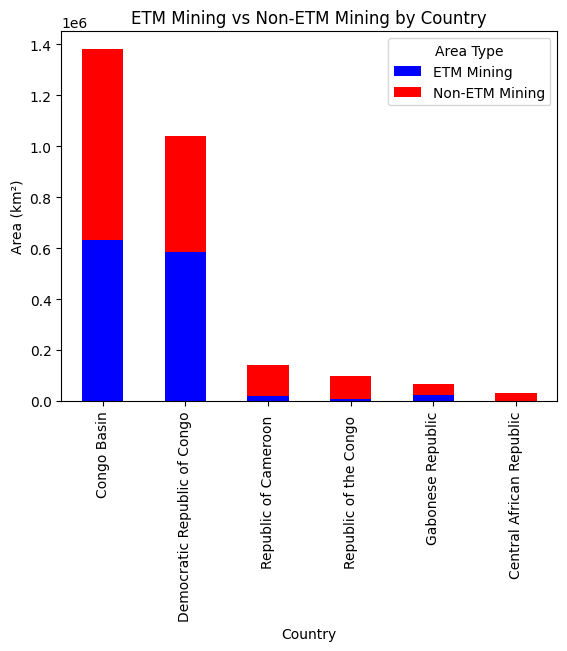

In [ ]:
colors = {'ETM Mining': 'blue', 'Non-ETM Mining': 'red'}

# Select only the columns you need ('ETM Mining' and 'Non-ETM Mining')
summary_table[['ETM Mining', 'Non-ETM Mining']].plot(kind='bar', stacked=True, color=[colors[col] for col in summary_table.columns if col in colors])
plt.title('ETM Mining vs Non-ETM Mining by Country')
plt.xlabel('Country')
plt.ylabel('Area (km²)')
plt.xticks(rotation=90)
plt.legend(loc='upper right', title='Area Type')
plt.show()

# Map of Congo Basin Traditonal & ETM mining concessions

<Axes: >

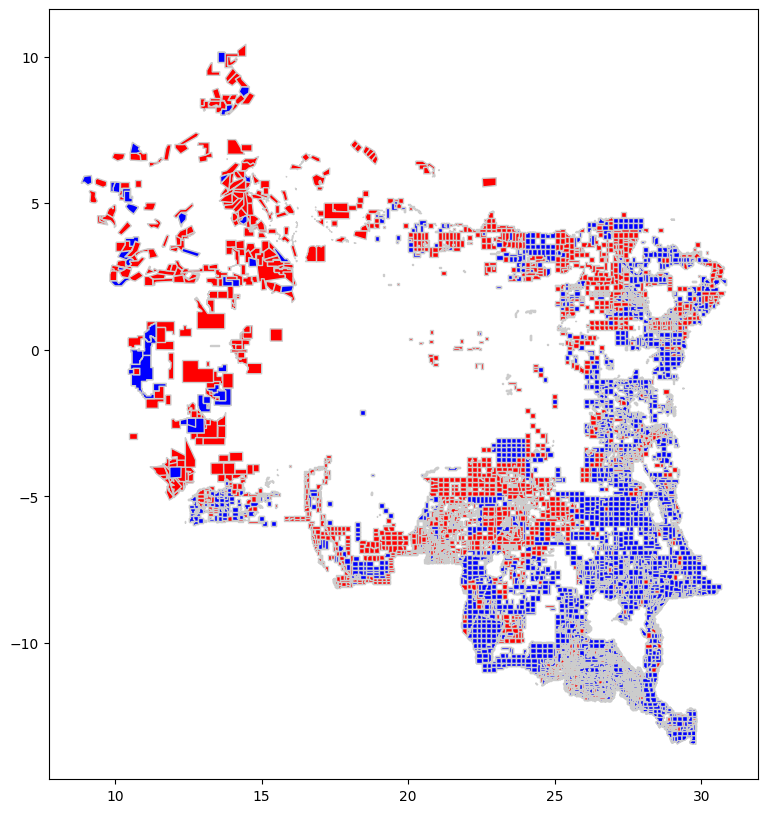

In [ ]:
# Plot all countries
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_selected.plot(ax=ax, color='red', edgecolor='0.8')
gdf_etm.plot(ax=ax, color='blue', edgecolor='0.8')

In [ ]:
# Save the work as gpkg

output_gpkg_path = '/content/drive/Shareddrives/R&D/PROJECTS/Database_Mining/Africa /Congo_Basin_Data.gpkg'


gdf_selected.to_file(output_gpkg_path, driver='GPKG')

print(f"GeoDataFrame saved to {output_gpkg_path}")

GeoDataFrame saved to /content/drive/Shareddrives/R&D/PROJECTS/Database_Mining/Africa /Congo_Basin_Data.gpkg
